# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. (a)
## Obtain the modified wavenumber for the 1st-order forward difference, 2nd-order central difference and fourth-order Pad´e scheme, respectively. Plot their real and imaginary parts separately and discuss your results.


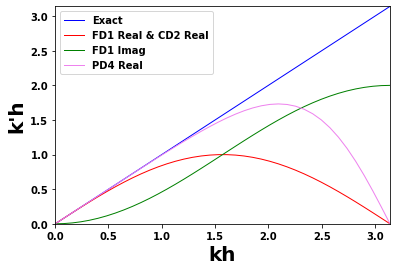

In [2]:
kh = np.linspace(0., np.pi, 40)

exact   = kh

fd1Real = np.sin(kh)
fd1Imag = 1. - np.cos(kh)

cd2Real = np.sin(kh)

pd4Real = 3. * np.sin(kh) / (np.cos(kh) + 2.)

fig, sub = plt.subplots()

sub.plot(kh,   exact, c = "b"     , label = "Exact"              , lw = 1)
sub.plot(kh, fd1Real, c = "r"     , label = "FD1 Real & CD2 Real", lw = 1)
sub.plot(kh, fd1Imag, c = "g"     , label = "FD1 Imag"           , lw = 1)
sub.plot(kh, pd4Real, c = "violet", label = "PD4 Real"           , lw = 1)

sub.set_xlim(0, np.pi)
sub.set_ylim(0, np.pi)

sub.set_xlabel("kh" , fontsize = 20)
sub.set_ylabel("k'h", fontsize = 20)

sub.legend()

plt.savefig("./HW2/a.png", dpi = 500, bbox_inches = "tight")

# 1. (b)
## Use a uniform grid with N+1 points, where N=40, to numerically compute the first derivative of f. Plot the exact and numerical solutions using each scheme and discuss your results.

In [3]:
def Exact(x):
    dx = x[1] - x[0]
    df = 10 * np.cos(10 * x)
    return df

def FD1(x):
    dx = x[1] - x[0]
    df = np.full(len(x), np.nan, dtype = float)
    for i in range(len(x)):
        if i == len(x) - 1:
            xplus = x[0]
            xzero = x[i]
        else:
            xplus = x[i + 1]
            xzero = x[i]
        df[i] = (np.sin(10 * xplus) - np.sin(10 * xzero)) / dx
    return df

def CD2(x):
    dx = x[1] - x[0]
    df = np.full(len(x), np.nan, dtype = float)
    for i in range(len(x)):
        if i == 0:
            xplus = x[i + 1]
            xmins = x[-1]
        elif i == len(x) - 1:
            xplus = x[0]
            xmins = x[i - 1]
        else:
            xplus = x[i + 1]
            xmins = x[i - 1]
        df[i] = (np.sin(10 * xplus) - np.sin(10 * xmins)) / (2 * dx)
    return df

def PD4(x):
    dx  = x[1] - x[0]
    phi = np.full(len(x), np.nan, dtype = float)
    A   = np.zeros((len(x), len(x)), dtype = float)
    for i in range(len(x)):
        A[i, i] = 4.
        if i == 0:
            A[i,    -1] = 1.
            A[i, i + 1] = 1.
        elif i == len(x) - 1:
            A[i,     0] = 1.
            A[i, i - 1] = 1.
        else:
            A[i, i - 1] = 1.
            A[i, i + 1] = 1.
    for i in range(len(x)):
        if i == 0:
            xplus = x[i + 1]
            xmins = x[-1]
        elif i == len(x) - 1:
            xplus = x[0]
            xmins = x[i - 1]
        else:
            xplus = x[i + 1]
            xmins = x[i - 1]
        phi[i] = np.sin(10 * xplus) - np.sin(10 * xmins)
    df = (3 / dx) * np.matmul(np.linalg.inv(A), phi)
    return df

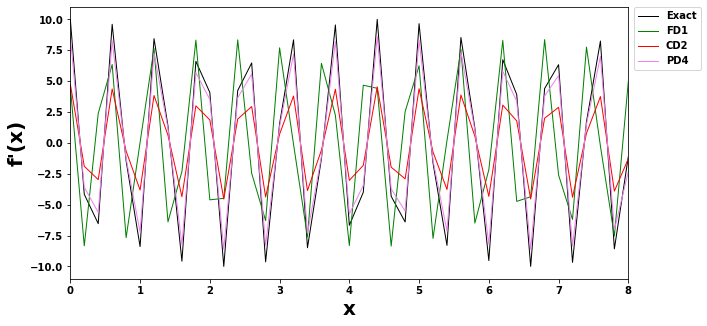

In [4]:
N = 40
x = np.linspace(0., 8., N + 1)

dfExact = Exact(x)
dfFD1   = FD1(x)
dfCD2   = CD2(x)
dfPD4   = PD4(x)

fig, sub = plt.subplots(figsize = (10, 5))

sub.plot(x, dfExact, c = "k"     , lw = 1, label = "Exact")
sub.plot(x, dfFD1  , c = "g"     , lw = 1, label = "FD1"  )
sub.plot(x, dfCD2  , c = "r"     , lw = 1, label = "CD2"  )
sub.plot(x, dfPD4  , c = "violet", lw = 1, label = "PD4"  )

sub.set_xlim(0, 8)

sub.set_xlabel("x"    , fontsize = 20)
sub.set_ylabel("f'(x)", fontsize = 20)

sub.legend(bbox_to_anchor = (1.01, 1), loc = "upper left", borderaxespad = 0.)

plt.savefig("./HW2/b.png", dpi = 500, bbox_inches = "tight")

# 1. (c)
## Investigate the accuracy of each scheme at x=4 with varying the grid spacing h (= ∆x) = 0.2,0.1,0.05 and 0.025.

### (i) h=0.2

FD1 difference = -1.6388
CD2 difference = 3.6372
PD4 difference = 0.9260


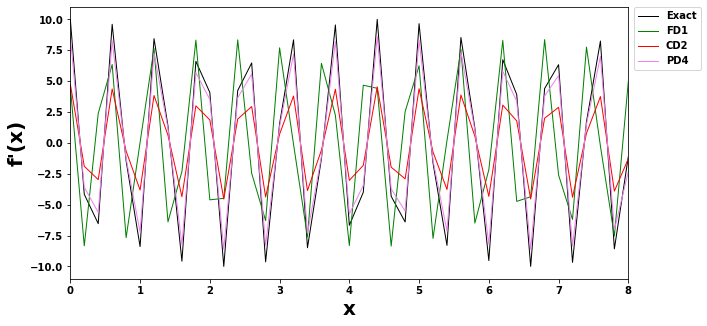

In [6]:
dx = 0.2
x  = np.arange(0., 8. + dx, dx)

dfExact = Exact(x)
dfFD1   = FD1(x)
dfCD2   = CD2(x)
dfPD4   = PD4(x)

ind = np.where(x == 4)[0][0]

print("FD1 difference = %.4f" % (dfFD1[ind] - dfExact[ind]))
print("CD2 difference = %.4f" % (dfCD2[ind] - dfExact[ind]))
print("PD4 difference = %.4f" % (dfPD4[ind] - dfExact[ind]))

fig, sub = plt.subplots(figsize = (10, 5))

sub.plot(x, dfExact, c = "k"     , lw = 1, label = "Exact")
sub.plot(x, dfFD1  , c = "g"     , lw = 1, label = "FD1"  )
sub.plot(x, dfCD2  , c = "r"     , lw = 1, label = "CD2"  )
sub.plot(x, dfPD4  , c = "violet", lw = 1, label = "PD4"  )

sub.set_xlim(0, 8)

sub.set_xlabel("x"    , fontsize = 20)
sub.set_ylabel("f'(x)", fontsize = 20)

sub.legend(bbox_to_anchor = (1.01, 1), loc = "upper left", borderaxespad = 0.)

plt.savefig("./HW2/c0.2.png", dpi = 500, bbox_inches = "tight")

### (ii) h=0.1

FD1 difference = -2.3680
CD2 difference = 1.0573
PD4 difference = 0.0417


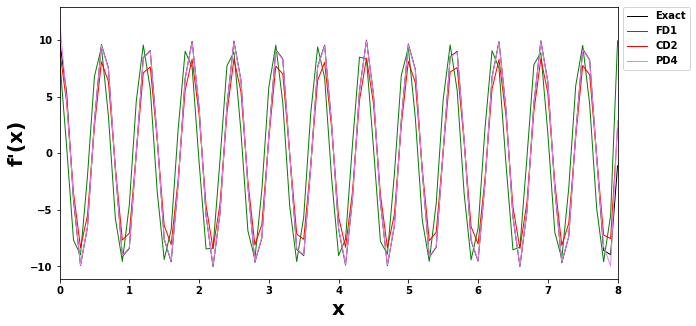

In [7]:
dx = 0.1
x  = np.arange(0., 8. + dx, dx)

dfExact = Exact(x)
dfFD1   = FD1(x)
dfCD2   = CD2(x)
dfPD4   = PD4(x)

ind = np.where(x == 4)[0][0]

print("FD1 difference = %.4f" % (dfFD1[ind] - dfExact[ind]))
print("CD2 difference = %.4f" % (dfCD2[ind] - dfExact[ind]))
print("PD4 difference = %.4f" % (dfPD4[ind] - dfExact[ind]))

fig, sub = plt.subplots(figsize = (10, 5))

sub.plot(x, dfExact, c = "k"     , lw = 1, label = "Exact")
sub.plot(x, dfFD1  , c = "g"     , lw = 1, label = "FD1"  )
sub.plot(x, dfCD2  , c = "r"     , lw = 1, label = "CD2"  )
sub.plot(x, dfPD4  , c = "violet", lw = 1, label = "PD4"  )

sub.set_xlim(0, 8)

sub.set_xlabel("x"    , fontsize = 20)
sub.set_ylabel("f'(x)", fontsize = 20)

sub.legend(bbox_to_anchor = (1.01, 1), loc = "upper left", borderaxespad = 0.)

plt.savefig("./HW2/c0.1.png", dpi = 500, bbox_inches = "tight")

### (iii) h=0.05

FD1 difference = -1.5499
CD2 difference = 0.2744
PD4 difference = 0.0024


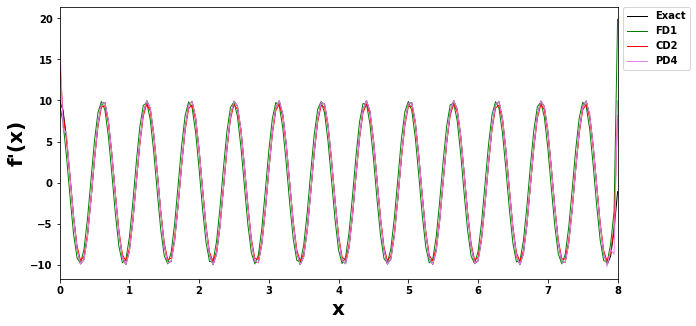

In [8]:
dx = 0.05
x  = np.arange(0., 8. + dx, dx)

dfExact = Exact(x)
dfFD1   = FD1(x)
dfCD2   = CD2(x)
dfPD4   = PD4(x)

ind = np.where(x == 4)[0][0]

print("FD1 difference = %.4f" % (dfFD1[ind] - dfExact[ind]))
print("CD2 difference = %.4f" % (dfCD2[ind] - dfExact[ind]))
print("PD4 difference = %.4f" % (dfPD4[ind] - dfExact[ind]))

fig, sub = plt.subplots(figsize = (10, 5))

sub.plot(x, dfExact, c = "k"     , lw = 1, label = "Exact")
sub.plot(x, dfFD1  , c = "g"     , lw = 1, label = "FD1"  )
sub.plot(x, dfCD2  , c = "r"     , lw = 1, label = "CD2"  )
sub.plot(x, dfPD4  , c = "violet", lw = 1, label = "PD4"  )

sub.set_xlim(0, 8)

sub.set_xlabel("x"    , fontsize = 20)
sub.set_ylabel("f'(x)", fontsize = 20)

sub.legend(bbox_to_anchor = (1.01, 1), loc = "upper left", borderaxespad = 0.)

plt.savefig("./HW2/c0.05.png", dpi = 500, bbox_inches = "tight")

### (iv) h=0.025

FD1 difference = -0.8573
CD2 difference = 0.0693
PD4 difference = 0.0001


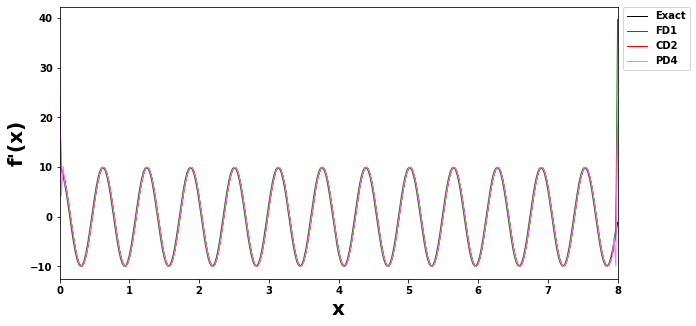

In [9]:
dx = 0.025
x  = np.arange(0., 8. + dx, dx)

dfExact = Exact(x)
dfFD1   = FD1(x)
dfCD2   = CD2(x)
dfPD4   = PD4(x)

ind = np.where(x == 4)[0][0]

print("FD1 difference = %.4f" % (dfFD1[ind] - dfExact[ind]))
print("CD2 difference = %.4f" % (dfCD2[ind] - dfExact[ind]))
print("PD4 difference = %.4f" % (dfPD4[ind] - dfExact[ind]))

fig, sub = plt.subplots(figsize = (10, 5))

sub.plot(x, dfExact, c = "k"     , lw = 1, label = "Exact")
sub.plot(x, dfFD1  , c = "g"     , lw = 1, label = "FD1"  )
sub.plot(x, dfCD2  , c = "r"     , lw = 1, label = "CD2"  )
sub.plot(x, dfPD4  , c = "violet", lw = 1, label = "PD4"  )

sub.set_xlim(0, 8)

sub.set_xlabel("x"    , fontsize = 20)
sub.set_ylabel("f'(x)", fontsize = 20)

sub.legend(bbox_to_anchor = (1.01, 1), loc = "upper left", borderaxespad = 0.)

plt.savefig("./HW2/c0.025.png", dpi = 500, bbox_inches = "tight")

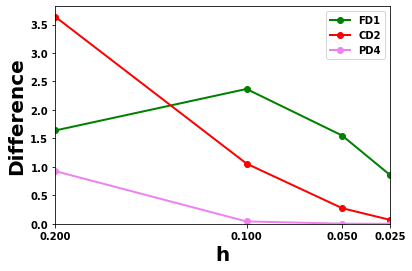

In [10]:
dx      = [0.2, 0.1, 0.05, 0.025]
lossFD1 = [1.6388, 2.3680,  1.5499,   0.8573]
lossCD2 = [3.6372, 1.0573,  0.2744,   0.0693]
lossPD4 = [0.9260, 0.0417,  0.0024,   0.0001]

fig, sub = plt.subplots()

sub.plot(dx, lossFD1, c = "g"     , lw = 2, marker= "o", label = "FD1")
sub.plot(dx, lossCD2, c = "r"     , lw = 2, marker= "o", label = "CD2")
sub.plot(dx, lossPD4, c = "violet", lw = 2, marker= "o", label = "PD4")

sub.set_xlabel("h"         , fontsize = 20)
sub.set_ylabel("Difference", fontsize = 20)

sub.set_xticks(dx)

sub.set_xlim(0.2, 0.025)
sub.set_ylim(bottom = 0.)

sub.legend()

plt.savefig("./HW2/c.png", dpi = 500, bbox_inches = "tight")